In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_SinglePulsarStackedLSTM_v2_flowsamples.npy'

In [135]:
samples_dict=np.load(filename,allow_pickle=True).item()


In [109]:
#samples_dict2=np.load('testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples.npy',allow_pickle=True).item()

In [137]:
parstemp=np.empty((10,0,22))
for ii in range(1000):
    start=ii*100
    end=ii*100+100
    temptemp=np.load('likelihoods/'+filename+'/'+filename+'_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
    parstemp=np.hstack((parstemp,temptemp[:,:,:22]))
    
print(np.unique((parstemp-samples_dict['samples']).reshape((-1))))

[0.]


In [112]:
#parstemp=np.empty((10,0,12))
#for ii in range(1000):
#    start=ii*100
#    end=ii*100+100
#    temptemp=np.load('likelihoods/testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples.npy/testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples.npy_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
#    parstemp=np.hstack((parstemp,temptemp[:,:,:12]))
#    
#print(np.unique((parstemp-samples_dict2['samples']).reshape((-1))))

[0.]


In [138]:
parstemp.shape

(10, 100000, 22)

In [139]:
samples_dict['samples'].shape

(10, 100000, 22)

In [140]:
samples_dict['likelihoods'].shape

(10, 100000)

In [141]:
ll_true=np.empty((10,0))
for ii in range(1000):
    start=ii*100
    end=ii*100+100
    temptemp=np.load('likelihoods/'+filename+'/'+filename+'_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
    ll_true=np.hstack((ll_true,temptemp[:,:,-1]))
    
#ll_true2=np.empty((10,0))
#for ii in range(1000):
#    start=ii*100
#    end=ii*100+100
#    temptemp=np.load('likelihoods/testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples.npy/testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples.npy_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
#    ll_true2=np.hstack((ll_true2,temptemp[:,:,-1]))
    
            

In [162]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_UniformPrior_flowsamples.npy'
start=6100
end=start+100
temptemp=np.load(filename+'_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')


In [165]:
temptemp[:,:,-1]

array([[-45620.19221265, -45196.74247011, -44421.4359373 ,
        -43791.4373656 , -45567.01300795, -45123.8178328 ,
        -45013.18283884, -45362.53229297, -43554.55839301,
        -45472.40728085, -45433.46468668, -43691.32990234,
        -44945.1238427 , -45214.78655912, -45336.27760418,
        -45000.93478445, -45573.32702738, -45521.32028928,
        -45407.8747166 , -44683.82484268, -45134.18264204,
        -45588.67188498, -45289.39507577, -43393.49015315,
        -45327.70579516, -45517.3943266 , -45229.71666651,
        -43388.52120988, -45364.66602583, -45323.98603366,
        -45537.09259262, -45012.42119659, -45451.54293889,
        -43619.7042187 , -45024.54371949, -45615.10839991,
        -44116.14943117, -45495.82543903, -45447.24416182,
        -44950.97834512, -45625.48299285, -43742.06111109,
        -44188.24042804, -45464.9411328 , -44203.18482936,
        -45224.63662937, -45178.429655  , -45098.87150897,
        -44838.55224041, -43793.5386068 , -44881.1805396

In [142]:
ll_true.shape

(10, 100000)

In [26]:
temptemp[:,:,-1].shape

(10, 100)

In [143]:
samples_dict_out=samples_dict
samples_dict_out['true likelihoods']=ll_true

In [122]:
#samples_dict2_out=samples_dict2
#samples_dict2_out['true likelihoods']=ll_true2

In [145]:
filename.strip('.npy')

'testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_SinglePulsarStackedLSTM_v2_flowsamples'

In [146]:
np.save(filename.strip('.npy')+'_with_trueLL.npy',samples_dict_out,allow_pickle=True)



In [124]:
#np.save('testpoints_fLDeltaf0.01_5p_withRN_forsteve_newRN_SimpleDNN_flowsamples_with_trueLL.npy',samples_dict2_out,allow_pickle=True)



In [147]:
samples_dict.keys()

dict_keys(['samples', 'residuals', 'likelihoods', 'true likelihoods'])

# Compute effective sample size (reweighting efficiency)

In [44]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_SinglePulsarStackedLSTM_v2_flowsamples.npy'

In [45]:
samples_dict=np.load(filename.strip('.npy')+'_with_trueLL.npy',allow_pickle=True).item()

In [546]:
ll_true=-samples_dict['true likelihoods']
ll_flow=samples_dict['likelihoods']

In [471]:
ll_true.shape,ll_flow.shape

((10, 100000), (10, 100000))

In [367]:
(ll_true[0]+45500)[:100]

array([ -38.73974787, -231.53392374, -239.19165191, -261.13227843,
       -257.96320558, -240.72368619, -230.02648254, -195.88181596,
       -227.91936846, -276.05810471, -269.42376272, -263.14807731,
       -258.05985591, -184.00932182, -224.41924142, -217.25657086,
       -169.77526807, -262.00753506, -223.98529087, -189.00503129,
       -269.6692829 , -234.08315577, -240.12177004, -274.26867266,
        -54.51157373, -281.95260423, -278.3996962 , -119.77239309,
       -278.22440649, -263.80054217,  -75.30427398, -212.73338123,
       -196.37843134, -274.14548085, -253.9586289 , -121.01137843,
       -199.55182929, -238.67002683, -125.94544952, -250.15308639,
       -160.94568398,  -74.54727341, -272.69151558, -208.58541057,
       -224.76613573, -236.57704175, -174.01867937, -272.42167427,
       -251.70341111, -196.83988188, -186.29190197, -279.42101517,
       -219.5115477 , -170.01412921, -200.91605881, -228.56920703,
       -219.17796915, -210.5333221 , -251.69853805,  -85.35248

In [388]:
-samples_dict['likelihoods'][0][:100]

array([-18.27980614, -20.71143341, -18.67933655, -17.42418671,
       -12.15896606, -17.64473534, -19.12056351, -18.30913162,
       -14.72018814, -17.46490479, -19.0642395 , -17.49541092,
       -15.78670311, -16.97389412, -18.23441315, -18.63779068,
       -20.84589577, -18.81625557, -15.53140163, -18.11524963,
       -15.88366508, -14.18831253, -16.60863495, -14.00092316,
       -17.69480515, -16.48578262, -17.77021408, -17.05899239,
       -18.58120918, -13.81655121, -19.18387032, -17.02522087,
       -19.50940895, -14.84314537, -13.84444427, -18.10797882,
       -17.77206802,  -6.86929417, -15.85577106, -16.11214828,
       -17.44207573, -17.14202881, -15.07514572, -19.13972092,
       -18.42958641, -17.16180229, -17.97236824, -13.84715843,
       -19.19935417, -15.8780632 , -10.12218189, -19.54141045,
       -19.23459625, -17.39231873, -20.43370628, -19.07492256,
       -14.04270172, -15.61805534, -18.89565277, -16.57605171,
       -17.78473282, -12.01556015, -16.58298874, -14.32

In [447]:
problist=np.exp(ll_true-45550)

problistpt=problist[0]
finitemask=np.isfinite(problistpt)
nonzeromask=problistpt>0

In [457]:
finitemask=np.isfinite(ll_true[0])

In [458]:
indsort_top10k=np.argsort(ll_true[0][finitemask])[-10000:]

In [467]:
indsort_bottom10k=np.argsort(ll_true[0][finitemask])[:10000]

In [459]:
ll_true[0][finitemask][indsort_top10k]

array([45769.899387  , 45769.89959502, 45769.8999992 , ...,
       45788.42157361, 45788.435392  , 45788.6240332 ])

In [468]:
ll_true[0][finitemask][indsort_bottom10k]

array([38949.24511465, 39056.1404842 , 39474.88355022, ...,
       45554.51157373, 45554.51642912, 45554.53078247])

Text(0, 0.5, 'LL flow')

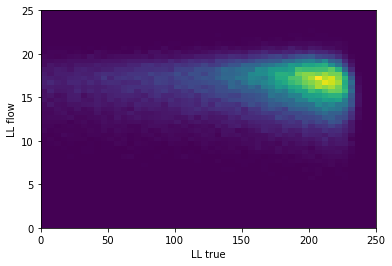

In [483]:
_=plt.hist2d(ll_true[0][finitemask]-45550,ll_flow[0][finitemask],range=[[0,250],[0,25]],bins=50)
plt.xlabel('LL true')
plt.ylabel('LL flow')

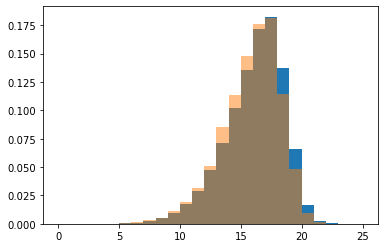

In [469]:
_=plt.hist(ll_flow[0],bins=25,density=True,range=[0,25])
_=plt.hist(ll_flow[0][finitemask][indsort_bottom10k],bins=25,density=True,range=[0,25],alpha=0.5)


(0.0, 120.0)

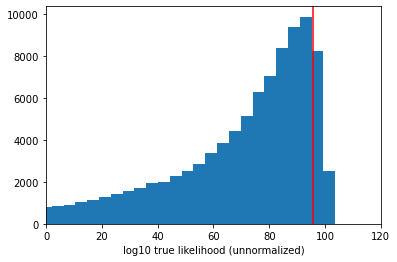

In [424]:
import matplotlib.pyplot as plt

_=plt.hist(np.log10(problistpt[finitemask & nonzeromask]),bins=100)
plt.axvline(np.log10(np.sort(problistpt[finitemask])[-10000]),color='r')
plt.xlabel('log10 true likelihood (unnormalized)')
plt.xlim(0,120)

In [415]:
problist=np.exp(-ll_true-samples_dict['likelihoods']-45550)
testpoints_weights={}
testpoints_pars={}
ncut=2000
print(ncut)
for ii in range(10):
    problistpt=problist[ii]
    finitemask=np.isfinite(problistpt)
    indsort=np.argsort(problistpt[finitemask])[:-ncut]
    testpoints_weights[ii]=problistpt[finitemask][indsort]
    normalization=np.sum(testpoints_weights[ii])
    testpoints_weights[ii]=testpoints_weights[ii]/normalization
#    testpoints_pars[ii]=parameters_allsamples[ii][finitemask][indsort]


#problist2=np.exp(-ll_true2-samples_dict['likelihoods']-26000)
#testpoints_weights2={}
#testpoints_pars2={}
#for ii in range(10):
#    problistpt=problist2[ii]
#    finitemask=np.isfinite(problistpt)
#    indsort=np.argsort(problistpt[finitemask])[:-ncut]
#    testpoints_weights2[ii]=problistpt[finitemask][indsort]
#    normalization=np.sum(testpoints_weights2[ii])
#    testpoints_weights2[ii]=testpoints_weights2[ii]/normalization
##    testpoints_pars[ii]=parameters_allsamples[ii][finitemask][indsort]


2000


In [416]:
np.sum(testpoints_weights[0]),np.sum(testpoints_weights2[0])

(0.9999999999999998, 1.0)

In [417]:
(1/np.sum(testpoints_weights[ii]**2))/len(samples_dict['likelihoods'][ii])

0.012789619752345693

In [418]:
esslist=[]
for ii in range(10):
    ess=(np.sum(testpoints_weights[ii])**2/np.sum(testpoints_weights[ii]**2))/len(samples_dict['likelihoods'][ii])
    esslist.append(ess)
    print(ess)

0.011800834372852717
0.03456219311355668
0.014128735130375642
0.019783015557211785
0.013449796025517198
0.030755961390787574
0.06866515865219619
0.03727539723397894
0.04104485534607109
0.012789619752345688


In [419]:
np.mean(esslist),np.std(esslist),np.min(esslist),np.max(esslist)

(0.02842555665748935,
 0.017100032112324918,
 0.011800834372852717,
 0.06866515865219619)

In [38]:
def calculate_weights(flowdict,offset=26000,ncut=2000):
    allsamples_flowll=flowdict['likelihoods']
    allsamples=flowdict['true likelihoods']
    parameters_allsamples=flowdict['samples']
    problist=np.exp(-allsamples_flowll-allsamples-offset)
    testpoints_weights={}
    testpoints_pars={}
    for ii in range(10):
        problistpt=problist[ii]
        finitemask=np.isfinite(problistpt)
        if ncut<=0:
            indsort=np.argsort(problistpt[finitemask])
        else:
            indsort=np.argsort(problistpt[finitemask])[:-ncut]
        testpoints_weights[ii]=problistpt[finitemask][indsort]
        normalization=np.sum(testpoints_weights[ii])
        testpoints_weights[ii]=testpoints_weights[ii]/normalization
        testpoints_pars[ii]=parameters_allsamples[ii][finitemask][indsort]

    return testpoints_pars,testpoints_weights

In [46]:
LSTM_pars_10p,LSTM_weights_10p=calculate_weights(samples_dict,offset=45500,ncut=2000)
LSTM_pars_10p_2,LSTM_weights_10p_2=calculate_weights(samples_dict,offset=45500,ncut=0)


In [510]:
len(LSTM_pars_10p[ii])

97999

In [47]:
esslist_100k=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p[ii]**2))/len(LSTM_pars_10p[ii])
    esslist_100k.append(ess)
    print(ess)

0.012041790602815048
0.035267903869995294
0.014417076663648616
0.02018675056858345
0.013724281658691021
0.03138363407223222
0.07006648842060834
0.038036119626509136
0.04188250545517458
0.013050765571430003


In [48]:
esslist_100k_2=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p_2[ii]**2))/len(LSTM_pars_10p_2[ii])
    esslist_100k_2.append(ess)
    print(ess)

0.00016702239534332276
0.00430679300580091
0.0006780592624879637
0.0007725386131593584
4.132339840326105e-05
0.00249659381731081
0.014767415383049888
0.001780612868238978
0.0056328316434829185
0.00022667185405171705


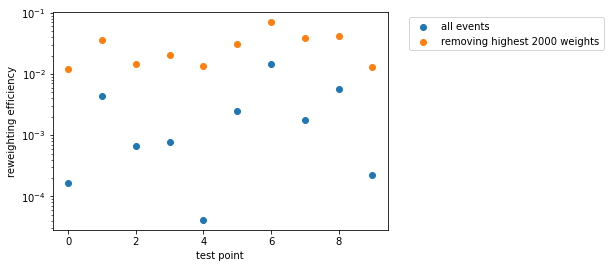

In [525]:
plt.scatter(range(10),esslist_2,label='all events')
plt.scatter(range(10),esslist,label='removing highest 2000 weights')
plt.yscale('log')
plt.xlabel('test point')
plt.ylabel('reweighting efficiency')
plt.legend(bbox_to_anchor=(1.05,1))

In [513]:
np.mean(esslist),np.std(esslist)

(0.0030869862241329126, 0.004284858262708051)

In [312]:
from chainconsumer import ChainConsumer


In [326]:
mcmcpoints=np.load('david_10datasets_chains.npy')

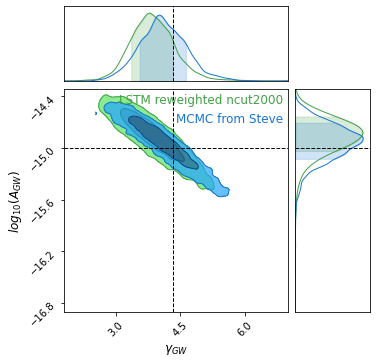

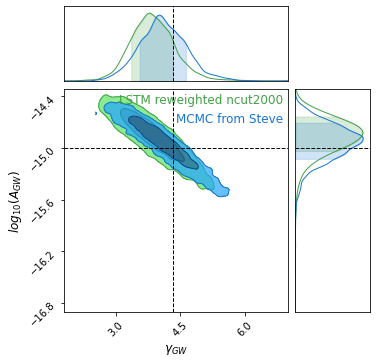

In [514]:
c = ChainConsumer()

for ii in range(1,2):
    c.add_chain(LSTM_pars_10p[ii][:,[1,0]],weights=LSTM_weights_10p[ii],\
    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='LSTM reweighted ncut2000',color='green')
#    c.add_chain(LSTM_pars_10p_2[ii][:,[1,0]],weights=LSTM_weights_10p_2[ii],\
#    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='LSTM reweighted ncut0',color='red')
    c.add_chain(mcmcpoints[ii],\
    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='MCMC from Steve',color='blue')

c.plotter.plot(display=True,figsize="column", truth=[13/3,-15])


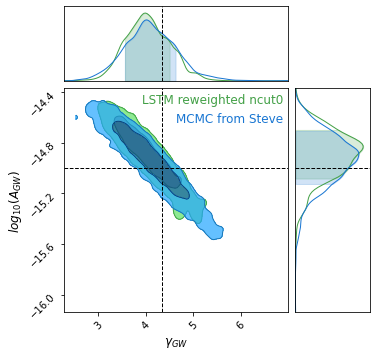

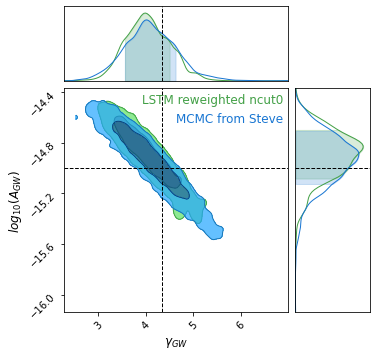

In [515]:
c = ChainConsumer()

for ii in range(1,2):
    c.add_chain(LSTM_pars_10p_2[ii][:,[1,0]],weights=LSTM_weights_10p_2[ii],\
    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='LSTM reweighted ncut0',color='green')
#    c.add_chain(LSTM_pars_10p_2[ii][:,[1,0]],weights=LSTM_weights_10p_2[ii],\
#    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='LSTM reweighted ncut0',color='red')
    c.add_chain(mcmcpoints[ii],\
    parameters=["$\gamma_{GW}$", "$log_{10}(A_{GW})$"],name='MCMC from Steve',color='blue')

c.plotter.plot(display=True,figsize="column", truth=[13/3,-15])


In [306]:
#for ii in range(10):
#    print((1/np.sum(testpoints_weights2[ii]**2))/len(samples_dict['likelihoods'][ii]))

In [105]:
#weights_oldmodel=np.load('testpoints_weights_dict.npy',allow_pickle=True).item()

In [156]:
#for ii in range(10):
#    print((1/np.sum(weights_oldmodel[ii]**2))/len(weights_oldmodel[ii]))

In [157]:
#for ii in range(10):
#    indsort=np.argsort(weights_oldmodel[ii])[:-ncut]
#    weightstemp=weights_oldmodel[ii][indsort]
#    normalization=np.sum(weightstemp)
#    weightstemp=weightstemp/normalization
#    print((1/np.sum(weightstemp**2))/100000)

# Redo for uniform prior

In [526]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_UniformPrior_flowsamples.npy'

In [527]:
samples_dict=np.load(filename,allow_pickle=True).item()


In [528]:
samples_dict['samples'].shape

(10, 100000, 22)

In [191]:
parstemp=np.empty((10,0,22))
ll_true=np.empty((10,0))
ll_prior=np.empty((10,0))

for ii in range(1000):
    start=ii*100
    end=ii*100+100
    # The true LL calculating job didn't finish because Eva needed the cluster for EPS
    # So we need to make do with what we have, some additional processing is required
    try:
        temptemp=np.load('likelihoods/'+filename+'/'+filename+'_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
        diff=np.unique(temptemp[:,:,:22]-samples_dict['samples'][:,start:end,:])
        if diff[0]!=0 or len(diff)>1:
            print(diff)
        parstemp=np.hstack((parstemp,temptemp[:,:,:22]))
        ll_true=np.hstack((ll_true,temptemp[:,:,-1]))
        ll_prior=np.hstack((ll_prior,samples_dict['likelihoods'][:,start:end]))
    except:
        continue
#print(np.unique((parstemp-samples_dict['samples']).reshape((-1))))

In [181]:
parstemp.shape

(10, 80200, 22)

In [170]:
samples_dict['samples'].shape

(10, 100000, 22)

In [171]:
samples_dict['likelihoods'].shape

(10, 100000)

In [142]:
ll_true.shape

(10, 100000)

In [184]:
samples_dict.keys()

dict_keys(['samples', 'residuals', 'likelihoods'])

In [192]:
samples_dict_out={}

samples_dict_out['residuals']=samples_dict['residuals']
samples_dict_out['samples']=parstemp
samples_dict_out['likelihoods']=ll_prior
samples_dict_out['true likelihoods']=ll_true

In [193]:
parstemp.shape,ll_prior.shape

((10, 80200, 22), (10, 80200))

In [194]:
np.save(filename.strip('.npy')+'_with_trueLL.npy',samples_dict_out,allow_pickle=True)



## Compute effective sample size (reweighting efficiency)

In [64]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_UniformPrior_flowsamples_1M.npy'

samples_dict=np.load(filename.strip('.npy')+'_with_trueLL.npy',allow_pickle=True).item()

In [530]:
samples_dict['likelihoods'][0][:100]

array([9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
       9.11703743e-18, 9.11703743e-18, 9.11703743e-18, 9.11703743e-18,
      

In [531]:
ll_true=-samples_dict['true likelihoods']
ll_prior=np.log10(samples_dict['likelihoods'])

In [532]:
finitemask=np.isfinite(ll_true[0])

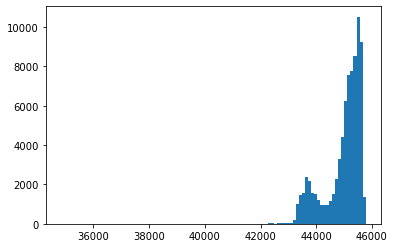

In [498]:
_=plt.hist(ll_true[0][finitemask],bins=100)

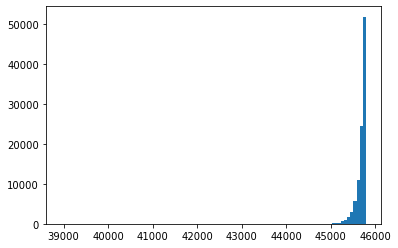

In [503]:
_=plt.hist(ll_true[0][finitemask],bins=100)

In [537]:
ll_true

array([[45392.49253646, 45349.78439684, 45529.25750037, ...,
        45603.16995835, 43382.88821239, 45534.79632513],
       [44125.6919106 , 44070.17098856, 45343.06374524, ...,
        45478.41510908, 45159.39854301, 43943.94845584],
       [45614.43125319, 43135.50176739, 42847.81840857, ...,
        45625.19060543, 45297.44840347, 43898.79574842],
       ...,
       [43608.10356758, 40829.49846124, 43352.62189602, ...,
        45343.38820748, 44980.90245438, 45600.16629855],
       [41952.71096556, 45433.41458297, 45671.41701948, ...,
        45279.97225942, 43233.19266084, 43935.77446952],
       [44495.6616311 , 45555.87865636, 45636.84940241, ...,
        43845.31456321, 45586.10213904, 45090.10198703]])

In [538]:
problist=np.exp(ll_true-45550) # don't need to include the constant ll from the prior since this will be removed by the normalization anyway
testpoints_weights={}
testpoints_pars={}
ncut=20
for ii in range(10):
    problistpt=problist[ii]
    finitemask=np.isfinite(problistpt)
    indsort=np.argsort(problistpt[finitemask]) #[:-ncut]
    testpoints_weights[ii]=problistpt[finitemask][indsort]
    normalization=np.sum(testpoints_weights[ii])
    testpoints_weights[ii]=testpoints_weights[ii]/normalization


In [65]:
LSTM_pars_10p,LSTM_weights_10p=calculate_weights(samples_dict,offset=45500,ncut=2000)
LSTM_pars_10p_2,LSTM_weights_10p_2=calculate_weights(samples_dict,offset=45500,ncut=0)


In [539]:
np.sum(testpoints_weights[0]),np.sum(testpoints_weights2[0])

(1.0, 1.0)

In [540]:
(1/np.sum(testpoints_weights[ii]**2))/len(samples_dict['likelihoods'][ii])

1.2472458356565232e-05

In [541]:
len(testpoints_weights[0])

80200

In [66]:
esslist_prior=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p[ii]**2))/len(LSTM_pars_10p[ii])
    esslist_prior.append(ess)
    print(ess)

0.00024492943053944867
0.00042286033975311627
0.00023756352221495527
0.00033703925066230235
0.00019033088368731554
0.00033550689911397344
0.0003759320463081218
0.0003016832450631617
0.0002620205402018836
0.0001996485943913222


In [67]:
esslist_prior_2=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p_2[ii]**2))/len(LSTM_pars_10p_2[ii])
    esslist_prior_2.append(ess)
    print(ess)

1.0727283207017636e-06
1.575853732803352e-06
1.0316530958748097e-06
1.501394540673395e-06
6.131963890163415e-06
2.8995905468542886e-06
1.8398791868890081e-06
3.0326484598399523e-06
1.1415019241352985e-06
1.385052600976039e-06


In [543]:
esslist_prior=[]
for ii in range(10):
    ess=(1/np.sum(testpoints_weights[ii]**2))/len(testpoints_weights[ii])
    esslist_prior.append(ess)
    print(ess)

2.4701265042248805e-05
1.2633490466820247e-05
2.261290823846502e-05
1.956651111861076e-05
2.7995513045971584e-05
1.2480820700638097e-05
1.3302408291351174e-05
1.3896657142020037e-05
1.2598853381102737e-05
1.2472458356565232e-05


In [269]:
np.mean(esslist),np.std(esslist),np.min(esslist),np.max(esslist)

(1.722608857837937e-05,
 5.660851362056606e-06,
 1.2472458356565232e-05,
 2.7995513045971584e-05)

In [155]:
#for ii in range(10):
#    print((1/np.sum(testpoints_weights2[ii]**2))/len(samples_dict['likelihoods'][ii]))

In [105]:
#weights_oldmodel=np.load('testpoints_weights_dict.npy',allow_pickle=True).item()

In [156]:
#for ii in range(10):
#    print((1/np.sum(weights_oldmodel[ii]**2))/len(weights_oldmodel[ii]))

In [157]:
#for ii in range(10):
#    indsort=np.argsort(weights_oldmodel[ii])[:-ncut]
#    weightstemp=weights_oldmodel[ii][indsort]
#    normalization=np.sum(weightstemp)
#    weightstemp=weightstemp/normalization
#    print((1/np.sum(weightstemp**2))/100000)

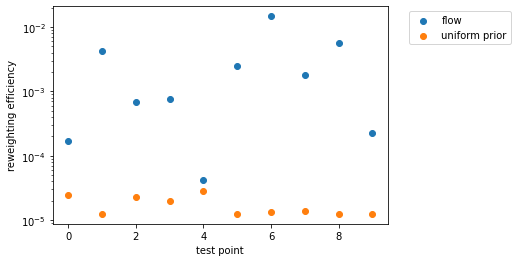

In [550]:
plt.scatter(range(10),esslist_2,label='flow')
plt.scatter(range(10),esslist_prior,label='uniform prior')
plt.yscale('log')
plt.xlabel('test point')
plt.ylabel('reweighting efficiency')
plt.legend(bbox_to_anchor=(1.05,1))

# 1M flow samples

In [2]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_SinglePulsarStackedLSTM_v2_flowsamples_1M.npy'

In [3]:
samples_dict=np.load(filename,allow_pickle=True).item()


In [4]:
samples_dict['samples'].shape

(10, 1000000, 22)

In [5]:
import time

In [31]:
parstemp=[]
#parstemp2=np.empty((10,0,22))
ll_true=[] #np.empty((10,0))
ll_prior=[] #np.empty((10,0))

t0=time.time()
for ii in range(10000):
    t1=time.time()
    if ii%100==0:
        print(ii)
        print(t1-t0)
    start=ii*100
    end=ii*100+100
    # The true LL calculating job didn't finish because Eva needed the cluster for EPS
    # So we need to make do with what we have, some additional processing is required
    try:
        temptemp=np.load('likelihoods/'+filename+'/'+filename+'_likelihoods_start_'+str(start)+'_end_'+str(end)+'.npy')
        diff=np.unique(temptemp[:,:,:22]-samples_dict['samples'][:,start:end,:])
        if diff[0]!=0 or len(diff)>1:
            print(diff)
        parstemp+=(np.transpose(temptemp[:,:,:22],(1,0,2))).tolist()
        ll_true+=(np.transpose(temptemp[:,:,-1],(1,0))).tolist()
        ll_prior+=(np.transpose(samples_dict['likelihoods'][:,start:end],(1,0))).tolist()
#        parstemp2=np.hstack((parstemp2,temptemp[:,:,:22]))
#        ll_true=np.hstack((ll_true,temptemp[:,:,-1]))
#        ll_prior=np.hstack((ll_prior,samples_dict['likelihoods'][:,start:end]))
    except:
        continue
#print(np.unique((parstemp-samples_dict['samples']).reshape((-1))))

0
0.00021266937255859375
100
0.25995540618896484
200
0.5472629070281982
300
0.8533658981323242
400
1.3312828540802002
500
1.5255446434020996
600
1.9180865287780762
700
2.347435235977173
800
2.5243170261383057
900
3.023061752319336
1000
3.1996591091156006
1100
3.4578325748443604
1200
4.09179162979126
1300
4.312915563583374
1400
5.03181004524231
1500
5.2745201587677
1600
5.534457206726074
1700
5.794724941253662
1800
6.602073431015015
1900
6.819848299026489
2000
7.059430122375488
2100
7.322213649749756
2200
7.5768232345581055
2300
8.582618713378906
2400
8.825624942779541
2500
9.058370351791382
2600
9.296501159667969
2700
9.537822961807251
2800
10.70805835723877
2900
10.935385465621948
3000
11.199837923049927
3100
11.454052686691284
3200
11.689442157745361
3300
11.93540072441101
3400
12.181874990463257
3500
13.602602481842041
3600
13.859422445297241
3700
14.100605249404907
3800
14.341400623321533
3900
14.584114789962769
4000
14.83313274383545
4100
15.080689191818237
4200
15.333397388458252

In [32]:
parstemp=np.transpose(np.array(parstemp),(1,0,2))
ll_true=np.transpose(np.array(ll_true),(1,0))
ll_prior=np.transpose(np.array(ll_prior),(1,0))



In [35]:
ll_prior.shape

(10, 908100)

In [29]:
temptemp[:,:,-1].shape

(10, 100)

In [170]:
samples_dict['samples'].shape

(10, 100000, 22)

In [171]:
samples_dict['likelihoods'].shape

(10, 100000)

In [558]:
ll_true.shape

(10, 88600)

In [184]:
samples_dict.keys()

dict_keys(['samples', 'residuals', 'likelihoods'])

In [36]:
samples_dict_out={}

samples_dict_out['residuals']=samples_dict['residuals']
samples_dict_out['samples']=parstemp
samples_dict_out['likelihoods']=ll_prior
samples_dict_out['true likelihoods']=ll_true

In [37]:
np.save(filename.strip('.npy')+'_with_trueLL.npy',samples_dict_out,allow_pickle=True)



## Compute effective sample size (reweighting efficiency)

In [39]:
filename='testpoints_fLDeltaf0.01_10p_withRN_forsteve_newRN_SinglePulsarStackedLSTM_v2_flowsamples_1M.npy'

samples_dict=np.load(filename.strip('.npy')+'_with_trueLL.npy',allow_pickle=True).item()

In [40]:
samples_dict['likelihoods'][0][:100]

array([10.66222   , 10.6506958 , 19.42235947, 12.75438976, 17.01449966,
       18.28418732, 16.7316246 , 16.75311852, 16.83629608, 13.3021841 ,
       16.01831436, 16.39898872, 12.77083492, 14.82788372, 14.30996132,
       17.44171524, 19.1700592 , 15.05277252, 19.807724  , 13.75463009,
       19.86187553, 16.33711624, 18.16157913, 15.4001894 , 17.1569252 ,
       18.27235794, 15.60036945, 16.86217499, 11.25867462, 16.03230476,
       17.23629379, 14.71259403, 19.05346298, 14.16128063, 17.31634712,
       15.99304104, 18.61707306, 16.13658333, 12.77282429, 16.59004211,
       15.94935036, 12.37434387, 16.98433304, 14.71522141, 17.80959892,
       17.1403389 , 14.21235371, 18.46845627, 10.2898407 , 17.03384209,
       19.82172394, 17.19459152, 15.80486679, 15.38029099, 16.97964478,
       19.52665901, 12.63772583, 17.28074074, 13.53922081, 19.09988403,
       17.20150375, 10.98138046, 12.17883873, 13.7777729 , 18.80790329,
       15.72824097, 17.88503456, 15.85418797, 16.3905201 , 17.75

In [41]:
LSTM_pars_10p,LSTM_weights_10p=calculate_weights(samples_dict,offset=45500,ncut=2000)
LSTM_pars_10p_2,LSTM_weights_10p_2=calculate_weights(samples_dict,offset=45500,ncut=0)


In [510]:
len(LSTM_pars_10p[ii])

97999

In [42]:
esslist=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p[ii]**2))/len(LSTM_pars_10p[ii])
    esslist.append(ess)
    print(ess)

0.004271825979079414
0.016278985500161897
0.0053901089141237795
0.007302269839524575
0.004911298241314375
0.016574209608145627
0.03994276166504336
0.015635758419909385
0.020335429506029234
0.004210143827239943


In [43]:
esslist_2=[]
for ii in range(10):
    ess=(1/np.sum(LSTM_weights_10p_2[ii]**2))/len(LSTM_pars_10p_2[ii])
    esslist_2.append(ess)
    print(ess)

0.0001458947191967018
0.0004403193603483185
0.000627589357521888
0.00031629232156481566
0.00010303841848086114
0.002880523338660303
0.018153662319008716
0.0005819372073892826
0.0027273126428132197
0.00017267189143002339


Text(0.5, 1.0, '1M samples')

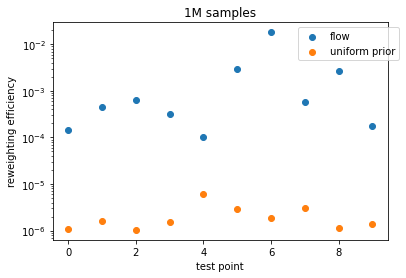

In [69]:
plt.scatter(range(10),esslist_2,label='flow')
plt.scatter(range(10),esslist_prior_2,label='uniform prior')
plt.yscale('log')
plt.xlabel('test point')
plt.ylabel('reweighting efficiency')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('1M samples')

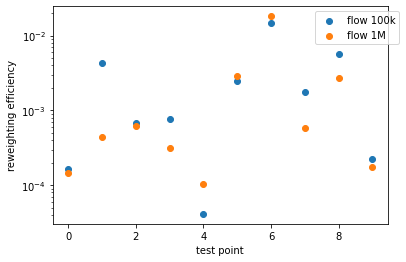

In [55]:
plt.scatter(range(10),esslist_100k_2,label='flow 100k')
plt.scatter(range(10),esslist_2,label='flow 1M')
plt.yscale('log')
plt.xlabel('test point')
plt.ylabel('reweighting efficiency')
plt.legend(bbox_to_anchor=(1.05,1))

In [61]:
np.mean(np.log10(esslist_100k_2)),np.std(np.log10(esslist_100k_2))

(-2.9884341156879572, 0.7434974799194898)

In [63]:
np.mean(np.log10(esslist_2)),np.std(np.log10(esslist_2))

(-3.172516089410542, 0.6645460328351066)